In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import matplotlib.ticker as ticker
from scipy.stats import norm
%matplotlib inline

### Task 1
#### point (a), the Euler approximation algorithm for OU process

In [3]:
def OU(X, Y, theta, sigma, dt):
    dW = np.random.normal(0, np.sqrt(dt))
    dX = -theta *  X * dt + sigma * dW
    dY = -theta *  Y * dt + sigma * dW
    return dX, dY

In [4]:
theta = 5
sigma = 3.5
N = 10000
X_ou = np.zeros(N)
Y_ou = np.zeros(N)
X_ou[0] = 10
Y_ou[0] = X_ou[0]
for i in range(1, N):
    dX, dY = OU(X_ou[i - 1], Y_ou[i - 1], theta, sigma, 1 / N)
    X_ou[i] = X_ou[i - 1] + dX
    Y_ou[i] = Y_ou[i - 1] + dY

In [5]:
def CIR(X, Y, theta1, theta2, theta3, dt):
    dW = np.random.normal(0, np.sqrt(dt))
    dX = (theta1 - theta2 * X) * dt + theta3 * np.sqrt(X) * dW
    dY = (theta1 - theta2 * Y) * dt + theta3 * np.sqrt(Y) * dW
    return dX, dY

In [6]:
theta1 = 2
theta2 = 0.2
theta3 = 0.15
N = 10000
X_cir = np.zeros(N)
Y_cir = np.zeros(N)
X_cir[0] = 10
Y_cir[0] = X_cir[0]
for i in range(1, N):
    dX, dY = CIR(X_cir[i - 1], Y_cir[i - 1], theta1, theta2, theta3, 1 / N)
    X_cir[i] = X_cir[i - 1] + dX
    Y_cir[i] = Y_cir[i - 1] + dY

In [7]:
def BSM(X, Y, theta1, theta2, dt):
    dW = np.random.normal(0, np.sqrt(dt))
    dX = theta1 * X * dt + theta2 * X * dW
    dY = theta1 * Y * dt + theta2 * Y * dW
    return dX, dY

In [8]:
theta1 = 1
theta2 = 0.1
N = 10000
X_bsm = np.zeros(N)
Y_bsm = np.zeros(N)
X_bsm[0] = 10
Y_bsm[0] = X_bsm[0]
for i in range(1, N):
    dX, dY = BSM(X_bsm[i - 1], Y_bsm[i - 1], theta1, theta2, 1 / N)
    X_bsm[i] = X_bsm[i - 1] + dX
    Y_bsm[i] = Y_bsm[i - 1] + dY

Text(0, 0.5, 'Y')

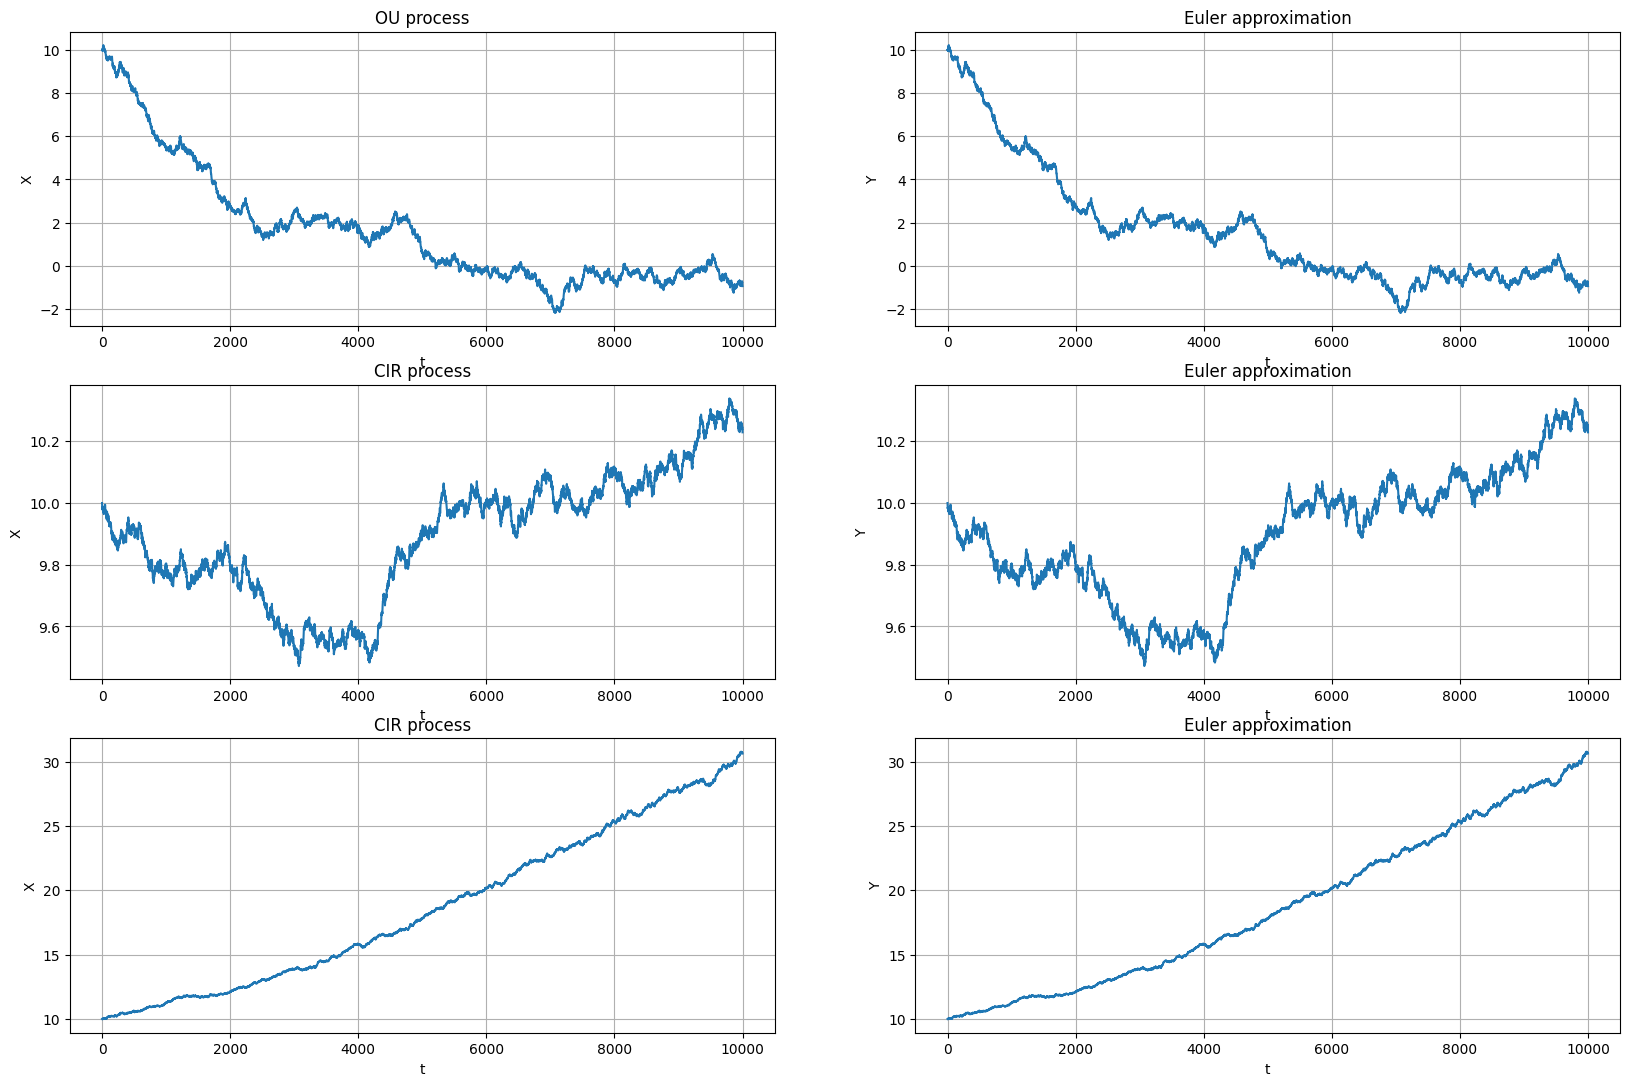

In [9]:
plt.rcParams['font.size'] = '10'

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 13))

axs[0, 0].grid()
axs[0, 0].plot(np.linspace(0, N, N), X_ou)
axs[0, 0].title.set_text('OU process')
axs[0, 0].set_xlabel('t')
axs[0, 0].set_ylabel('X')

axs[0, 1].grid()
axs[0, 1].plot(np.linspace(0, N, N), Y_ou)
axs[0, 1].title.set_text('Euler approximation')
axs[0, 1].set_xlabel('t')
axs[0, 1].set_ylabel('Y')


axs[1, 0].grid()
axs[1, 0].plot(np.linspace(0, N, N), X_cir)
axs[1, 0].title.set_text('CIR process')
axs[1, 0].set_xlabel('t')
axs[1, 0].set_ylabel('X')

axs[1, 1].grid()
axs[1, 1].plot(np.linspace(0, N, N), Y_cir)
axs[1, 1].title.set_text('Euler approximation')
axs[1, 1].set_xlabel('t')
axs[1, 1].set_ylabel('Y')


axs[2, 0].grid()
axs[2, 0].plot(np.linspace(0, N, N), X_bsm)
axs[2, 0].title.set_text('CIR process')
axs[2, 0].set_xlabel('t')
axs[2, 0].set_ylabel('X')

axs[2, 1].grid()
axs[2, 1].plot(np.linspace(0, N, N), Y_bsm)
axs[2, 1].title.set_text('Euler approximation')
axs[2, 1].set_xlabel('t')
axs[2, 1].set_ylabel('Y')

#### point(b), first Milstein schemes

In [10]:
def OU(X, Y, theta, sigma, dt):
    dW = np.random.normal(0, np.sqrt(dt))
    dX = -theta *  X * dt + sigma * dW
    dY = -theta *  Y * dt + sigma * dW
    return dX, dY

In [11]:
theta = 5
sigma = 3.5
N = 10000
X_ou = np.zeros(N)
Y_ou = np.zeros(N)
X_ou[0] = 10
Y_ou[0] = X_ou[0]
for i in range(1, N):
    dX, dY = OU(X_ou[i - 1], Y_ou[i - 1], theta, sigma, 1 / N)
    X_ou[i] = X_ou[i - 1] + dX
    Y_ou[i] = Y_ou[i - 1] + dY

In [12]:
def CIR(X, Y, theta1, theta2, theta3, dt):
    dW = np.random.normal(0, np.sqrt(dt))
    dX = (theta1 - theta2 * X) * dt + theta3 * np.sqrt(X) * dW
    dY = (theta1 - theta2 * Y) * dt + theta3 * np.sqrt(Y) * dW + (0.25 * theta3 ** 2 / 2)  * (dW ** 2 - dt)
    return dX, dY

In [13]:
theta1 = 2
theta2 = 0.2
theta3 = 0.15
N = 10000
X_cir = np.zeros(N)
Y_cir = np.zeros(N)
X_cir[0] = 10
Y_cir[0] = X_cir[0]
for i in range(1, N):
    dX, dY = CIR(X_cir[i - 1], Y_cir[i - 1], theta1, theta2, theta3, 1 / N)
    X_cir[i] = X_cir[i - 1] + dX
    Y_cir[i] = Y_cir[i - 1] + dY

In [14]:
def BSM(X, Y, theta1, theta2, dt):
    dW = np.random.normal(0, np.sqrt(dt))
    dX = theta1 * X * dt + theta2 * X * dW
    dY = theta1 * Y * dt + theta2 * Y * dW + 0.5 * theta2 * Y * (dW ** 2 - dt)
    return dX, dY

Text(0, 0.5, 'Y')

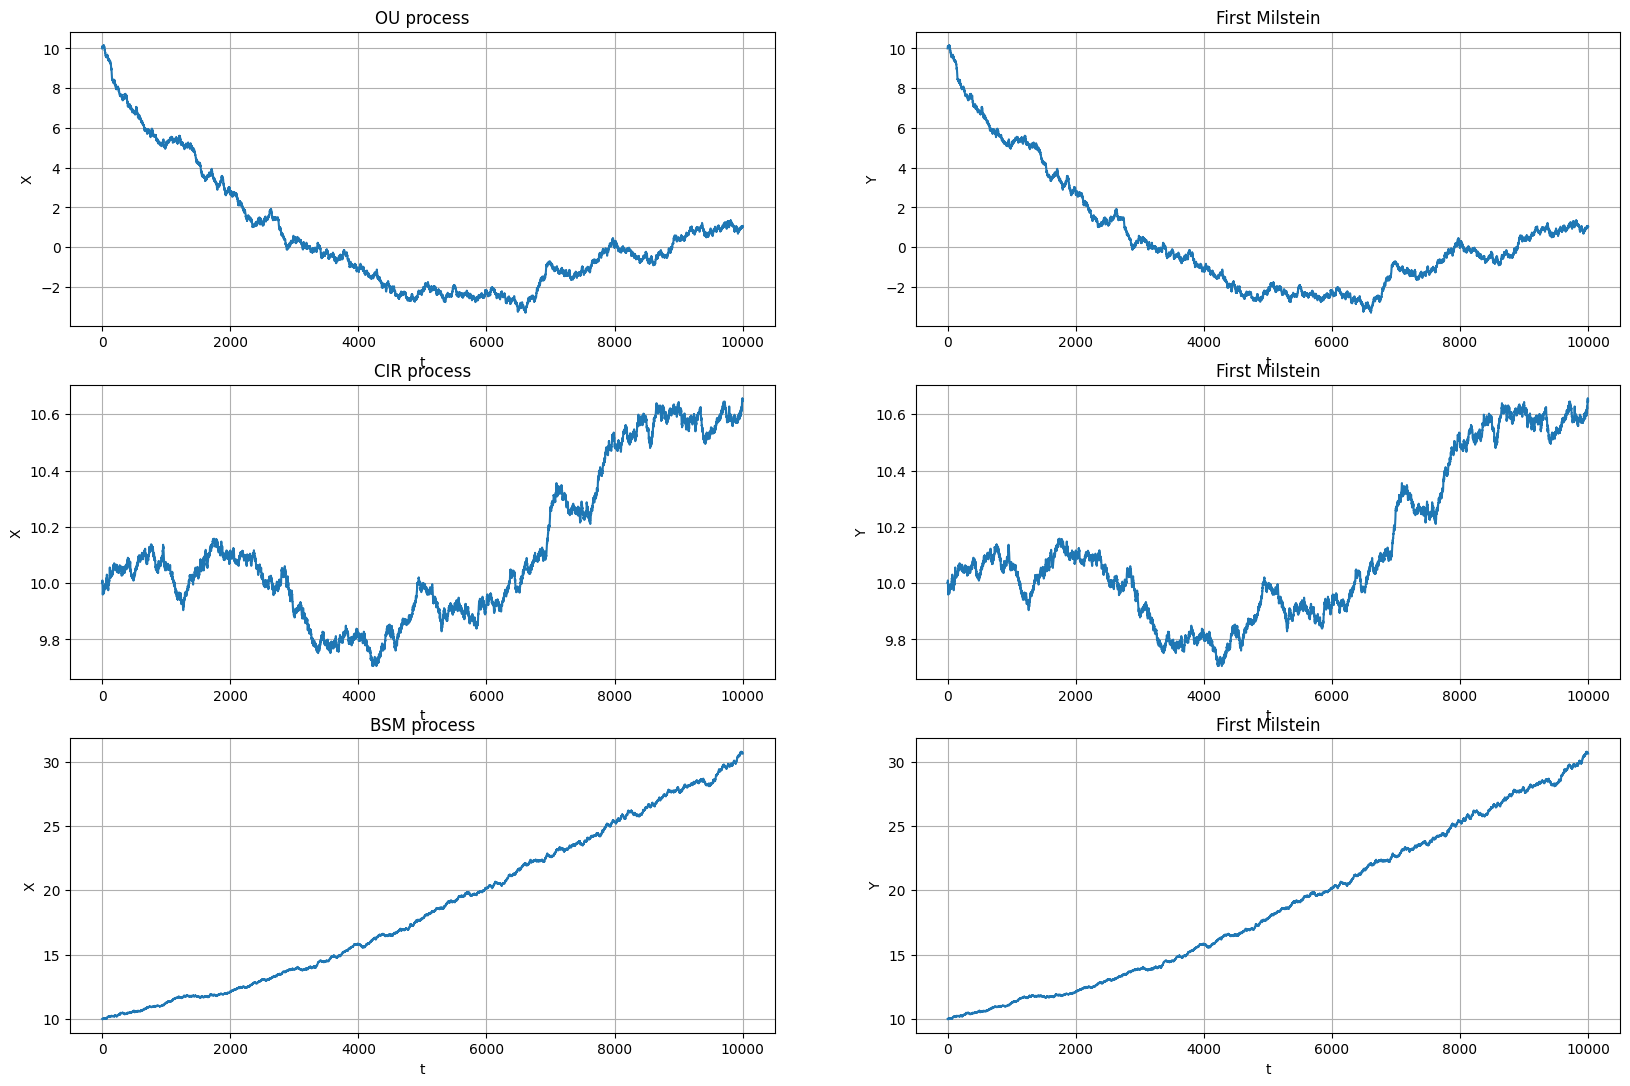

In [15]:
plt.rcParams['font.size'] = '10'

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 13))

axs[0, 0].grid()
axs[0, 0].plot(np.linspace(0, N, N), X_ou)
axs[0, 0].title.set_text('OU process')
axs[0, 0].set_xlabel('t')
axs[0, 0].set_ylabel('X')

axs[0, 1].grid()
axs[0, 1].plot(np.linspace(0, N, N), Y_ou)
axs[0, 1].title.set_text('First Milstein')
axs[0, 1].set_xlabel('t')
axs[0, 1].set_ylabel('Y')


axs[1, 0].grid()
axs[1, 0].plot(np.linspace(0, N, N), X_cir)
axs[1, 0].title.set_text('CIR process')
axs[1, 0].set_xlabel('t')
axs[1, 0].set_ylabel('X')

axs[1, 1].grid()
axs[1, 1].plot(np.linspace(0, N, N), Y_cir)
axs[1, 1].title.set_text('First Milstein')
axs[1, 1].set_xlabel('t')
axs[1, 1].set_ylabel('Y')


axs[2, 0].grid()
axs[2, 0].plot(np.linspace(0, N, N), X_bsm)
axs[2, 0].title.set_text('BSM process')
axs[2, 0].set_xlabel('t')
axs[2, 0].set_ylabel('X')

axs[2, 1].grid()
axs[2, 1].plot(np.linspace(0, N, N), Y_bsm)
axs[2, 1].title.set_text('First Milstein')
axs[2, 1].set_xlabel('t')
axs[2, 1].set_ylabel('Y')

#### point(b), second Milstein schemes

In [16]:
def second_milstein_schemes(Y, b, sigma, b_x, sigma_x, b_xx, sigma_xx, dW, dt):
    dY = ((b - 0.5 * sigma * sigma_x) * dt + sigma * dW + 0.5 * sigma * sigma_x * (dW ** 2) 
            + (dt ** 1.5) * (0.5 * b * sigma_x + 0.5 * b_x * sigma + 0.25 * sigma ** 2 * sigma_xx) * (dW / np.sqrt(dt))
            + (dt ** 2) * (0.5 * b * b_x + 0.25 * b_xx * (sigma ** 2)))
    return dY

In [17]:
def OU(X, theta1, theta2, dW, dt):
    dX = -theta1 * X * dt + theta2 * dW
    return dX

In [18]:
theta1 = 5
theta2 = 3.5
N = 10000
dW = np.random.normal(0, np.sqrt(1 / N), N)
X_ou = np.zeros(N)
Y_ou = np.zeros(N)
X_ou[0] = 10
Y_ou[0] = X_ou[0]

for i in range(1, N):
    dX = OU(X_ou[i - 1], theta1, theta2, dW[i], 1 / N)
    dY = second_milstein_schemes(Y_ou[i - 1], -theta1 * Y_ou[i - 1], theta2, -theta1, 0, 0, 0, dW[i],1 / N)
    X_ou[i] = X_ou[i - 1] + dX
    Y_ou[i] = Y_ou[i - 1] + dY

In [19]:
def CIR(X, theta1, theta2, theta3, dW, dt):
    dX = (theta1 - theta2 * X) * dt + theta3 * np.sqrt(X) * dW
    return dX

In [20]:
theta1 = 2
theta2 = 0.2
theta3 = 0.15
N = 10000
dW = np.random.normal(0, np.sqrt(1 / N), N)
X_cir = np.zeros(N)
Y_cir = np.zeros(N)
X_cir[0] = 10
Y_cir[0] = X_cir[0]

for i in range(1, N):
    dX = CIR(X_cir[i - 1], theta1, theta2, theta3, dW[i], 1 / N)
    dY = second_milstein_schemes(Y_cir[i - 1], theta1 - theta2 * Y_cir[i - 1], theta3 * np.sqrt(Y_cir[i - 1]),
                                 -theta2, theta3 * 0.5 / np.sqrt(Y_cir[i - 1]), 0, -0.25 * theta3 / (Y_cir[i - 1] ** 1.5), dW[i], 1 / N)
    X_cir[i] = X_cir[i - 1] + dX
    Y_cir[i] = Y_cir[i - 1] + dY

In [21]:
def BSM(X, theta1, theta2, dW, dt):
    dX = theta1 * X * dt + theta2 * X * dW
    return dX

In [22]:
theta1 = 1.0
theta2 = 0.2
N = 10000
dW = np.random.normal(0, np.sqrt(1 / N), N)
X_bsm = np.zeros(N)
Y_bsm = np.zeros(N)
X_bsm[0] = 10
Y_bsm[0] = X_bsm[0]

for i in range(1, N):
    dX = BSM(X_bsm[i - 1], theta1, theta2, dW[i], 1 / N)
    dY = second_milstein_schemes(Y_bsm[i - 1], theta1 * Y_bsm[i - 1], theta2 * Y_bsm[i - 1], theta1, theta2, 0, 0, dW[i], 1 / N)
    X_bsm[i] = X_bsm[i - 1] + dX
    Y_bsm[i] = Y_bsm[i - 1] + dY

Text(0, 0.5, 'Y')

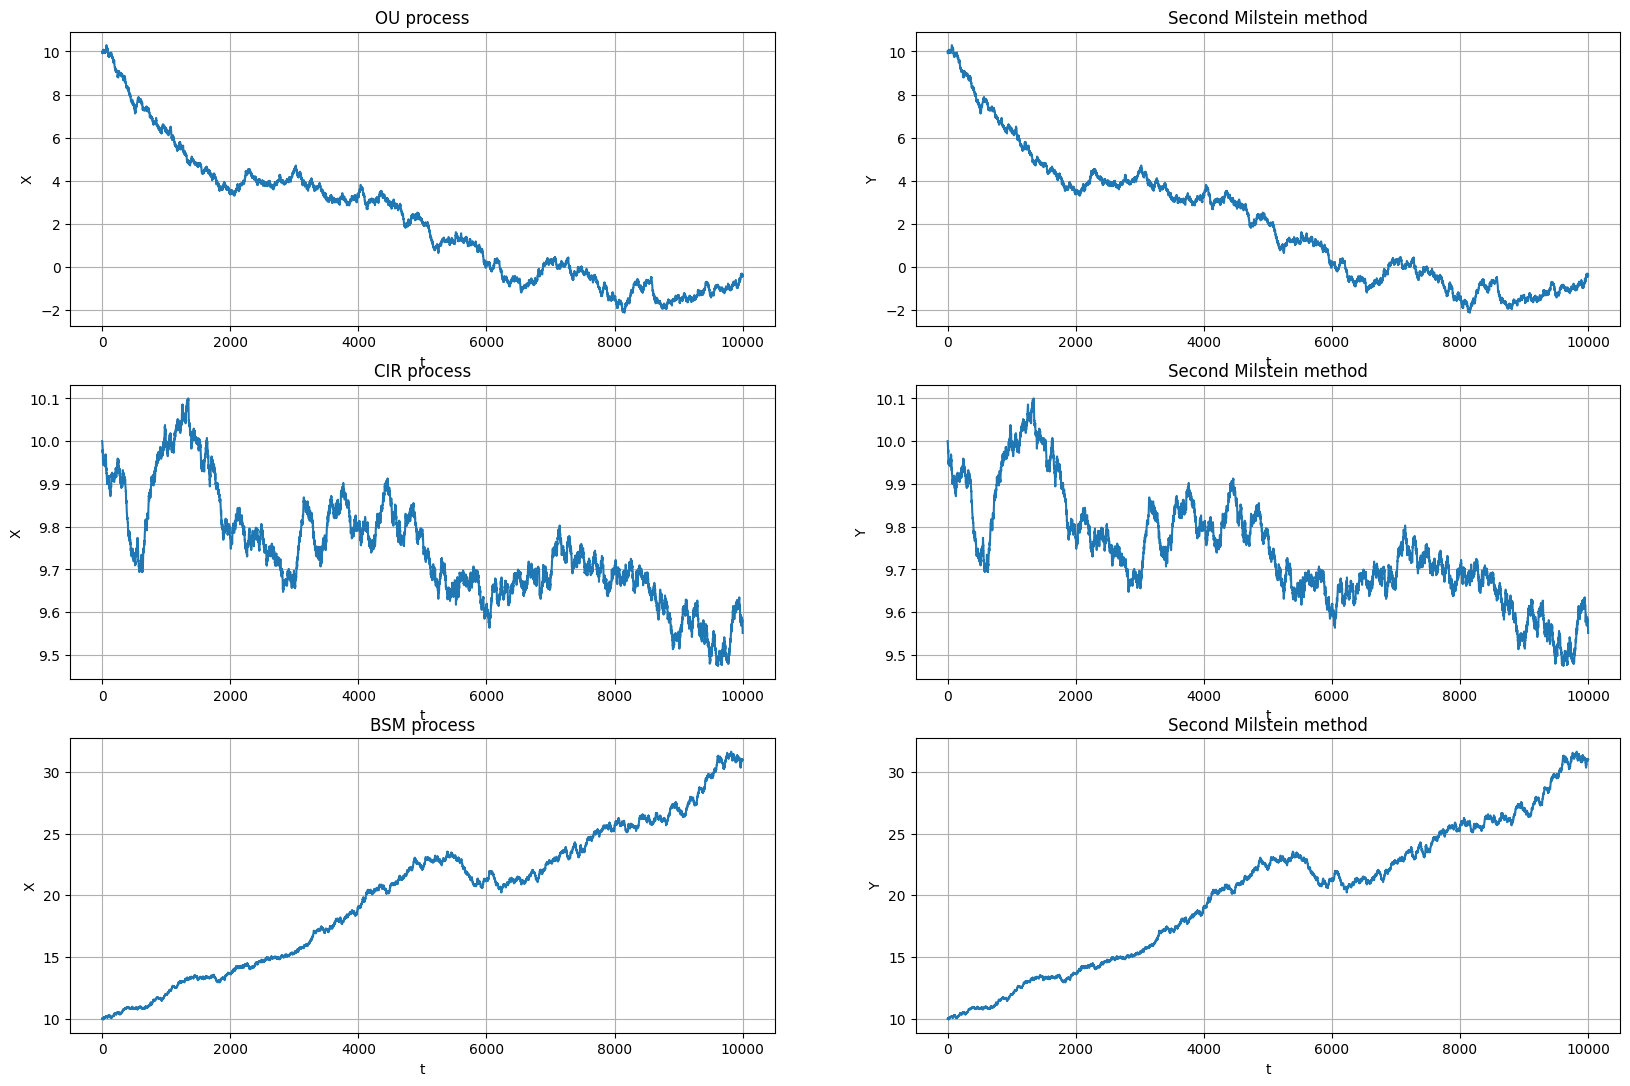

In [23]:
plt.rcParams['font.size'] = '10'

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 13))

axs[0, 0].grid()
axs[0, 0].plot(np.linspace(0, N, N), X_ou)
axs[0, 0].title.set_text('OU process')
axs[0, 0].set_xlabel('t')
axs[0, 0].set_ylabel('X')

axs[0, 1].grid()
axs[0, 1].plot(np.linspace(0, N, N), Y_ou)
axs[0, 1].title.set_text('Second Milstein method')
axs[0, 1].set_xlabel('t')
axs[0, 1].set_ylabel('Y')


axs[1, 0].grid()
axs[1, 0].plot(np.linspace(0, N, N), X_cir)
axs[1, 0].title.set_text('CIR process')
axs[1, 0].set_xlabel('t')
axs[1, 0].set_ylabel('X')

axs[1, 1].grid()
axs[1, 1].plot(np.linspace(0, N, N), Y_cir)
axs[1, 1].title.set_text('Second Milstein method')
axs[1, 1].set_xlabel('t')
axs[1, 1].set_ylabel('Y')


axs[2, 0].grid()
axs[2, 0].plot(np.linspace(0, N, N), X_bsm)
axs[2, 0].title.set_text('BSM process')
axs[2, 0].set_xlabel('t')
axs[2, 0].set_ylabel('X')

axs[2, 1].grid()
axs[2, 1].plot(np.linspace(0, N, N), Y_bsm)
axs[2, 1].title.set_text('Second Milstein method')
axs[2, 1].set_xlabel('t')
axs[2, 1].set_ylabel('Y')

#### point (c) predictor-corrector method

In [24]:
def predictor_corrector(Y, alpha, etha, b, sigma, sigma_x, dW, dt):
    Y_wave = Y + b * dt + sigma * dW
    b_wave = b - etha * sigma * sigma_x
    dY = (alpha * b_wave + (1 - alpha) * b_wave) * dt + (etha * sigma + (1 - etha) * sigma) * dW
    return dY

In [25]:
theta1 = 5
theta2 = 3.5
alpha = 0.5
etha = 0.5
N = 10000
dW = np.random.normal(0, np.sqrt(1 / N), N)
X_ou = np.zeros(N)
Y_ou = np.zeros(N)
X_ou[0] = 10
Y_ou[0] = X_ou[0]

for i in range(1, N):
    dX = OU(X_ou[i - 1], theta1, theta2, dW[i], 1 / N)
    dY = predictor_corrector(Y_ou[i - 1], alpha, etha, -theta1 * Y_ou[i - 1], theta2, 0, dW[i], 1 / N)
    X_ou[i] = X_ou[i - 1] + dX
    Y_ou[i] = Y_ou[i - 1] + dY

In [26]:
theta1 = 2
theta2 = 0.2
theta3 = 0.15
alpha = 0.5
etha = 0.5
N = 10000
dW = np.random.normal(0, np.sqrt(1 / N), N)
X_cir = np.zeros(N)
Y_cir = np.zeros(N)
X_cir[0] = 10
Y_cir[0] = X_cir[0]

for i in range(1, N):
    dX = CIR(X_cir[i - 1], theta1, theta2, theta3, dW[i], 1 / N)
    dY = predictor_corrector(Y_cir[i - 1], alpha, etha, (theta1 - theta2 * Y_cir[i - 1]), theta3 * np.sqrt(Y_cir[i - 1]), 
                            theta3 * 0.5 / np.sqrt(Y_cir[i - 1]), dW[i], 1 / N)
    X_cir[i] = X_cir[i - 1] + dX
    Y_cir[i] = Y_cir[i - 1] + dY

In [27]:
theta1 = 1.0
theta2 = 0.2
N = 10000
dW = np.random.normal(0, np.sqrt(1 / N), N)
X_bsm = np.zeros(N)
Y_bsm = np.zeros(N)
X_bsm[0] = 10
Y_bsm[0] = X_bsm[0]

for i in range(1, N):
    dX = BSM(X_bsm[i - 1], theta1, theta2, dW[i], 1 / N)
    dY = predictor_corrector(Y_bsm[i - 1], alpha, etha, theta1 * Y_bsm[i - 1], theta2 * Y_bsm[i - 1], theta2, dW[i], 1 / N)
    X_bsm[i] = X_bsm[i - 1] + dX
    Y_bsm[i] = Y_bsm[i - 1] + dY

Text(0, 0.5, 'Y')

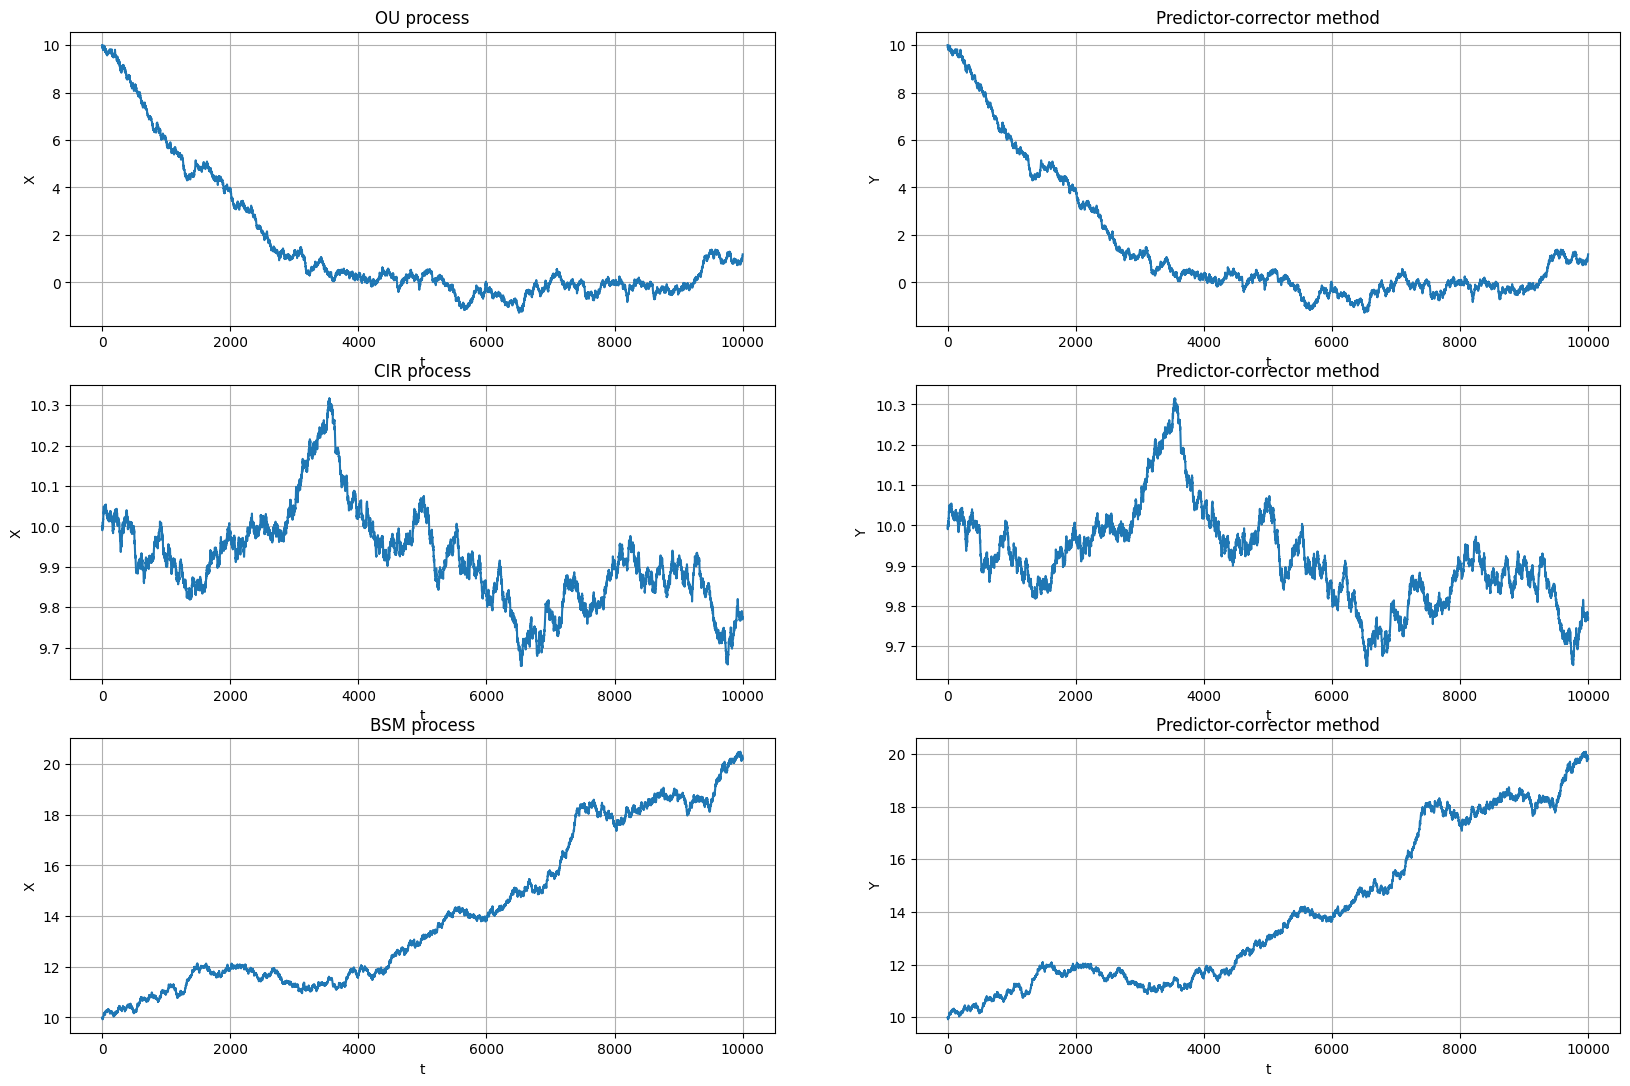

In [28]:
plt.rcParams['font.size'] = '10'

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 13))

axs[0, 0].grid()
axs[0, 0].plot(np.linspace(0, N, N), X_ou)
axs[0, 0].title.set_text('OU process')
axs[0, 0].set_xlabel('t')
axs[0, 0].set_ylabel('X')

axs[0, 1].grid()
axs[0, 1].plot(np.linspace(0, N, N), Y_ou)
axs[0, 1].title.set_text('Predictor-corrector method')
axs[0, 1].set_xlabel('t')
axs[0, 1].set_ylabel('Y')


axs[1, 0].grid()
axs[1, 0].plot(np.linspace(0, N, N), X_cir)
axs[1, 0].title.set_text('CIR process')
axs[1, 0].set_xlabel('t')
axs[1, 0].set_ylabel('X')

axs[1, 1].grid()
axs[1, 1].plot(np.linspace(0, N, N), Y_cir)
axs[1, 1].title.set_text('Predictor-corrector method')
axs[1, 1].set_xlabel('t')
axs[1, 1].set_ylabel('Y')


axs[2, 0].grid()
axs[2, 0].plot(np.linspace(0, N, N), X_bsm)
axs[2, 0].title.set_text('BSM process')
axs[2, 0].set_xlabel('t')
axs[2, 0].set_ylabel('X')

axs[2, 1].grid()
axs[2, 1].plot(np.linspace(0, N, N), Y_bsm)
axs[2, 1].title.set_text('Predictor-corrector method')
axs[2, 1].set_xlabel('t')
axs[2, 1].set_ylabel('Y')

#### Kloden-Platen-Schurz-Sorensen method

In [29]:
def KPSS(Y, b, sigma, b_x, sigma_x, b_xx, sigma_xx, sigma_sigma_x_x, dW, dt):
    dU = np.random.normal(0, (1 / 3) * (dt) ** 3)
    dY = (b * dt + sigma * dW + 0.5 * sigma * sigma_x * (dW ** 2 - dt)
        + sigma * b_x * dU + 0.5 * (b * b_x + 0.5 * sigma ** 2 * b_xx) * dt ** 2
        + (b * sigma_x + 0.5 * sigma ** 2 * sigma_xx) * (dW * dt - dU)
        + 0.5 * sigma * sigma_sigma_x_x * ((1 / 3) - dW ** 2 - dt) * dW)
    return dY

In [30]:
theta1 = 5
theta2 = 3.5
alpha = 0.5
etha = 0.5
N = 10000
dW = np.random.normal(0, np.sqrt(1 / N), N)
X_ou = np.zeros(N)
Y_ou = np.zeros(N)
X_ou[0] = 10
Y_ou[0] = X_ou[0]

for i in range(1, N):
    dX = OU(X_ou[i - 1], theta1, theta2, dW[i], 1 / N)
    dY = KPSS(Y_ou[i - 1], -theta1 * Y_ou[i - 1], theta2, -theta1, 0, 0, 0, 0, dW[i], 1 / N)
    X_ou[i] = X_ou[i - 1] + dX
    Y_ou[i] = Y_ou[i - 1] + dY

In [31]:
theta1 = 2
theta2 = 0.2
theta3 = 0.15
N = 10000
dW = np.random.normal(0, np.sqrt(1 / N), N)
X_cir = np.zeros(N)
Y_cir = np.zeros(N)
X_cir[0] = 10
Y_cir[0] = X_cir[0]

for i in range(1, N):
    dX = CIR(X_cir[i - 1], theta1, theta2, theta3, dW[i], 1 / N)
    dY = KPSS(Y_cir[i - 1], theta1 - theta2 * Y_cir[i - 1], theta3 * np.sqrt(Y_cir[i - 1]),
                                 -theta2, theta3 * 0.5 / np.sqrt(Y_cir[i - 1]), 0, -0.25 * theta3 / (Y_cir[i - 1] ** 1.5), 0, dW[i], 1 / N)
    X_cir[i] = X_cir[i - 1] + dX
    Y_cir[i] = Y_cir[i - 1] + dY

In [32]:
theta1 = 1.0
theta2 = 0.2
N = 10000
dW = np.random.normal(0, np.sqrt(1 / N), N)
X_bsm = np.zeros(N)
Y_bsm = np.zeros(N)
X_bsm[0] = 10
Y_bsm[0] = X_bsm[0]

for i in range(1, N):
    dX = BSM(X_bsm[i - 1], theta1, theta2, dW[i], 1 / N)
    dY = KPSS(Y_bsm[i - 1], theta1 * Y_bsm[i - 1], theta2 * Y_bsm[i - 1], theta1, theta2, 0, 0, theta2 ** 2, dW[i], 1 / N)
    X_bsm[i] = X_bsm[i - 1] + dX
    Y_bsm[i] = Y_bsm[i - 1] + dY

Text(0, 0.5, 'Y')

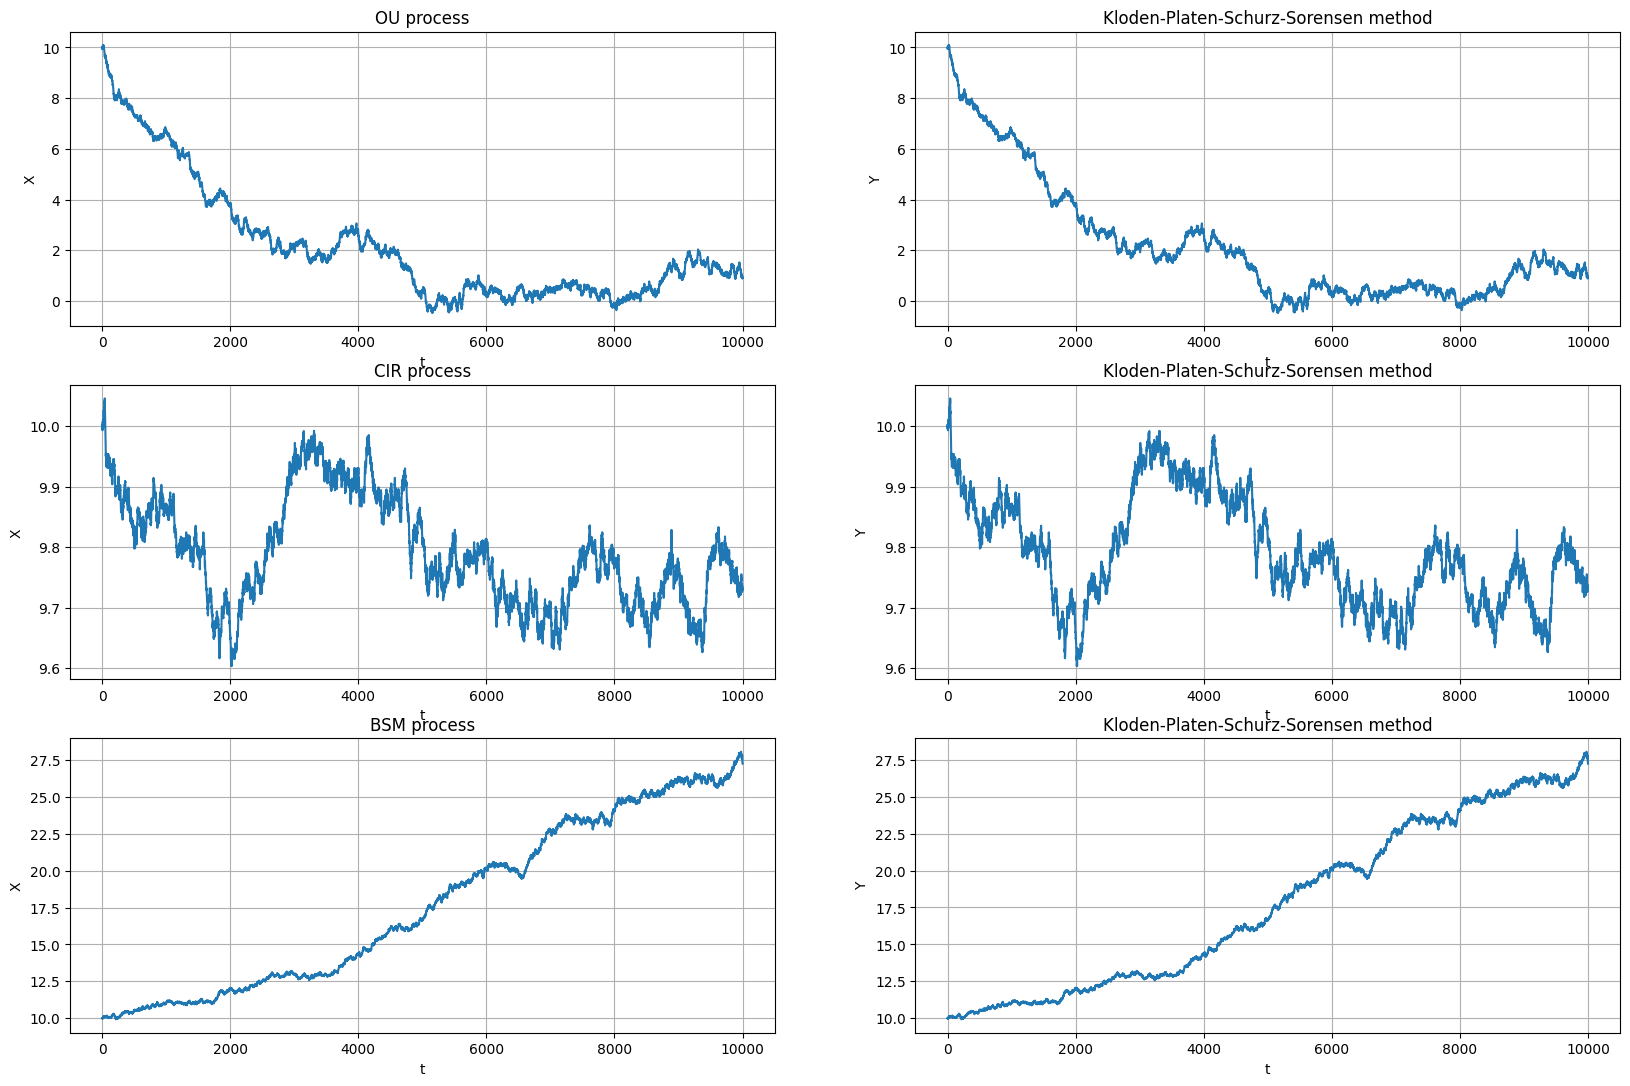

In [33]:
plt.rcParams['font.size'] = '10'

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 13))

axs[0, 0].grid()
axs[0, 0].plot(np.linspace(0, N, N), X_ou)
axs[0, 0].title.set_text('OU process')
axs[0, 0].set_xlabel('t')
axs[0, 0].set_ylabel('X')

axs[0, 1].grid()
axs[0, 1].plot(np.linspace(0, N, N), Y_ou)
axs[0, 1].title.set_text('Kloden-Platen-Schurz-Sorensen method')
axs[0, 1].set_xlabel('t')
axs[0, 1].set_ylabel('Y')


axs[1, 0].grid()
axs[1, 0].plot(np.linspace(0, N, N), X_cir)
axs[1, 0].title.set_text('CIR process')
axs[1, 0].set_xlabel('t')
axs[1, 0].set_ylabel('X')

axs[1, 1].grid()
axs[1, 1].plot(np.linspace(0, N, N), Y_cir)
axs[1, 1].title.set_text('Kloden-Platen-Schurz-Sorensen method')
axs[1, 1].set_xlabel('t')
axs[1, 1].set_ylabel('Y')


axs[2, 0].grid()
axs[2, 0].plot(np.linspace(0, N, N), X_bsm)
axs[2, 0].title.set_text('BSM process')
axs[2, 0].set_xlabel('t')
axs[2, 0].set_ylabel('X')

axs[2, 1].grid()
axs[2, 1].plot(np.linspace(0, N, N), Y_bsm)
axs[2, 1].title.set_text('Kloden-Platen-Schurz-Sorensen method')
axs[2, 1].set_xlabel('t')
axs[2, 1].set_ylabel('Y')

### Task2
Comparison of the convergence rate of Euler and Milstein schemes with the true value as a function of the discretization step ∆t = 1/N. Build a graph.

In [34]:
def CIR_euler(X, Y, theta1, theta2, theta3, dW, dt):
    dX = (theta1 - theta2 * X) * dt + theta3 * np.sqrt(X) * dW
    dY = (theta1 - theta2 * Y) * dt + theta3 * np.sqrt(Y) * dW
    return dX, dY

In [35]:
theta1 = 2
theta2 = 0.2
theta3 = 0.15
k = int(input())

error_eus = []
error_smc = []

for j in range(2, k):
    N = 2 ** j
    dW = np.random.normal(0, np.sqrt(1 / N), N)
    #создание значений аппроксимации milstein scheme
    X_smc = np.zeros(N)
    Y_smc = np.zeros(N)
    X_smc[0] = 10
    Y_smc[0] = X_smc[0]

    #создание значений аппроксимации euler scheme
    X_eus = np.zeros(N)
    Y_eus = np.zeros(N)
    X_eus[0] = 10
    Y_eus[0] = X_eus[0]

    for i in range(1, N):
        dX_smc = CIR(X_smc[i - 1], theta1, theta2, theta3, dW[i], 1 / N)
        dY_smc = second_milstein_schemes(Y_smc[i - 1], theta1 - theta2 * Y_smc[i - 1], theta3 * np.sqrt(Y_smc[i - 1]),
                                    -theta2, theta3 * 0.5 / np.sqrt(Y_smc[i - 1]), 0, -0.25 * theta3 / (Y_smc[i - 1] ** 1.5), dW[i], 1 / N)
        X_smc[i] = X_smc[i - 1] + dX_smc
        Y_smc[i] = Y_smc[i - 1] + dY_smc

        dX_eus, dY_eus = CIR_euler(X_eus[i - 1], Y_eus[i - 1],theta1, theta2, theta3, dW[i], 1 / N)
        X_eus[i] = X_eus[i - 1] + dX_eus
        Y_eus[i] = Y_eus[i - 1] + dY_eus
    error_eus.append(((X_eus - Y_eus)**2).mean())
    error_smc.append(((X_smc - Y_smc)**2).mean())
        

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


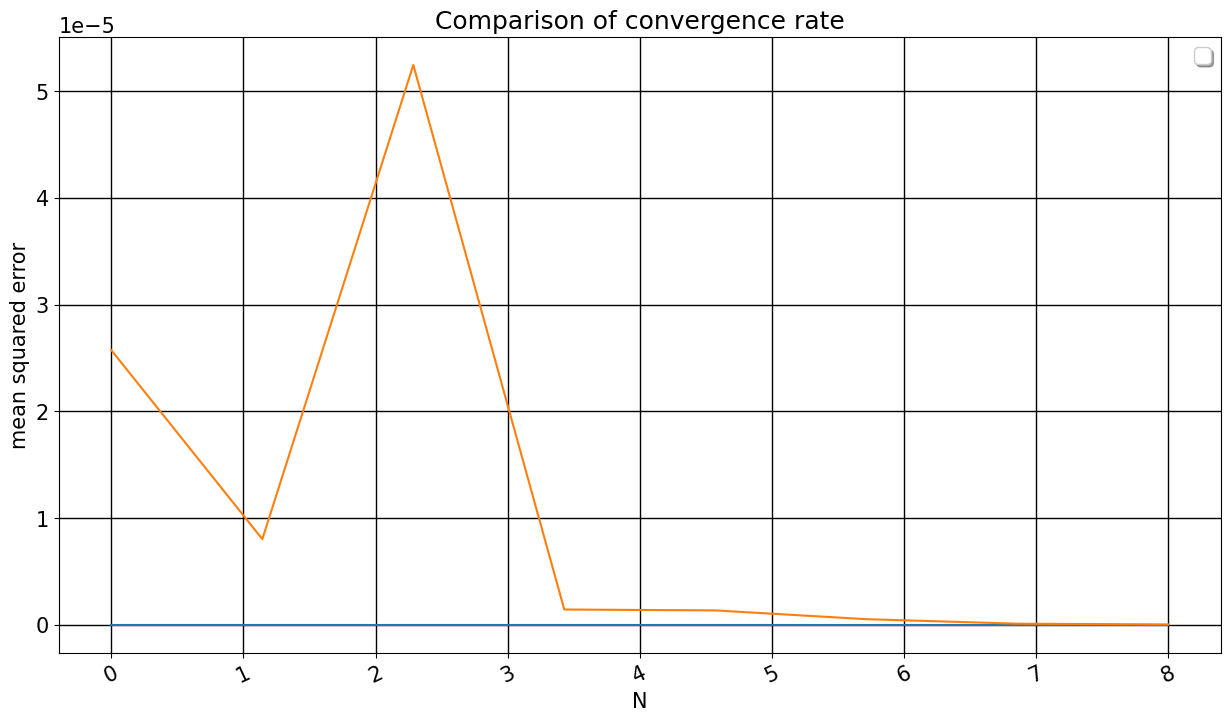

In [36]:
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()

plt.plot(np.linspace(0, len(error_eus), len(error_eus)), error_eus)
plt.plot(np.linspace(0, len(error_smc), len(error_smc)), error_smc)

ax.grid(color = 'black',    #  цвет линий
            linewidth = 1,    #  толщина
            linestyle = '-')    #  начертание
plt.legend(loc = 'best', fancybox = True, shadow = True)

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))  # интервал написания значений оси OX
# plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.0005))  # интервал написания значений оси OY
plt.xticks(rotation=25)

fig.set_figwidth(15)
fig.set_figheight(8)

ax.set_xlabel('N')
ax.set_ylabel('mean squared error')

plt.title('Comparison of convergence rate')
plt.show()


### Task 3

Write a random number generator function for the processes for which the conditional distribution (explicit solution) is known

#### point(a) Ornstien-Uhlenbec

In [75]:
from scipy.stats import norm

In [153]:
def OU(X, theta1, theta2, theta3, dW, dt):
    dX = (theta1 - theta2 * X) * dt + theta3 * dW
    return dX

In [154]:
def expected_value_OU(X_0, theta1, theta2, theta3, t):
    expected_value = (theta1 / theta2) + (X_0 - theta1 / theta2) * np.exp(-theta2 * t)
    return expected_value

In [155]:
def variance_OU(X_0, theta1, theta2, theta3, t):
    variance = ((theta3 ** 2) / (2 * theta2)) * (1 - np.exp(-2 * theta2 * t))
    return variance

In [174]:
theta1 = 2
theta2 = 0.2
theta3 = 0.15
N = 1000
dW = np.random.normal(0, np.sqrt(1 / N), N)
X_ou = np.zeros(N)
X_ou[0] = 10
Y_ou = np.zeros(N)
Y_ou[0] = X_ou[0]

for i in range(1, N):
    dX = OU(X_ou[i - 1], theta1, theta2, theta3, dW[i], 1 / N)
    X_ou[i] = X_ou[i - 1] + dX

    loc = expected_value_OU(X_ou[i], theta1, theta2, theta3, i / N)
    scale = variance_OU(X_ou[i], theta1, theta2, theta3, i / N)
    Y_ou[i] = np.random.normal(loc, scale, 1)[0]


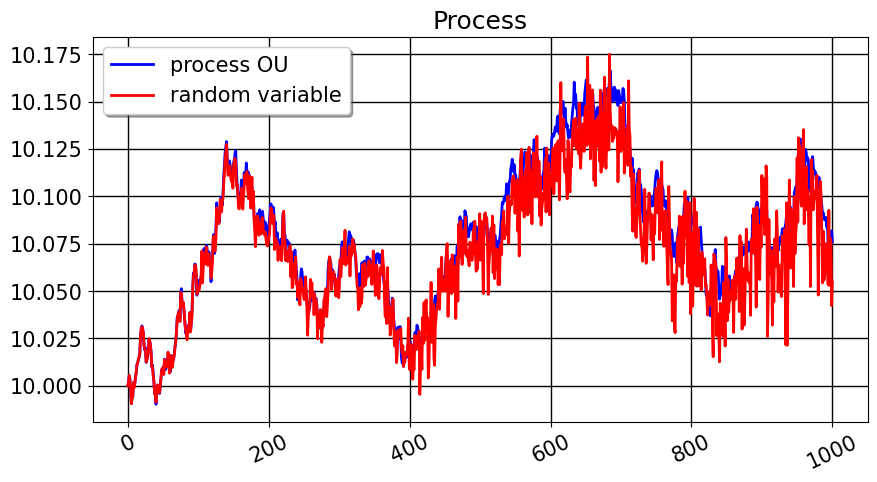

In [230]:
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()
ax.plot()
ax.plot(np.linspace(0, N, N), X_ou, 'b', linewidth=2, label='process OU')
ax.plot(np.linspace(0, N, N), Y_ou, 'r', linewidth=2, label='random variable')

ax.grid(color = 'black',    #  цвет линий
            linewidth = 1,    #  толщина
            linestyle = '-')    #  начертание
plt.legend(loc = 'best', fancybox = True, shadow = True)

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.05))  # интервал написания значений оси OX
#plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))  # интервал написания значений оси OY
plt.xticks(rotation=25)

fig.set_figwidth(10)
fig.set_figheight(5)

plt.title(f'Process')
plt.show()

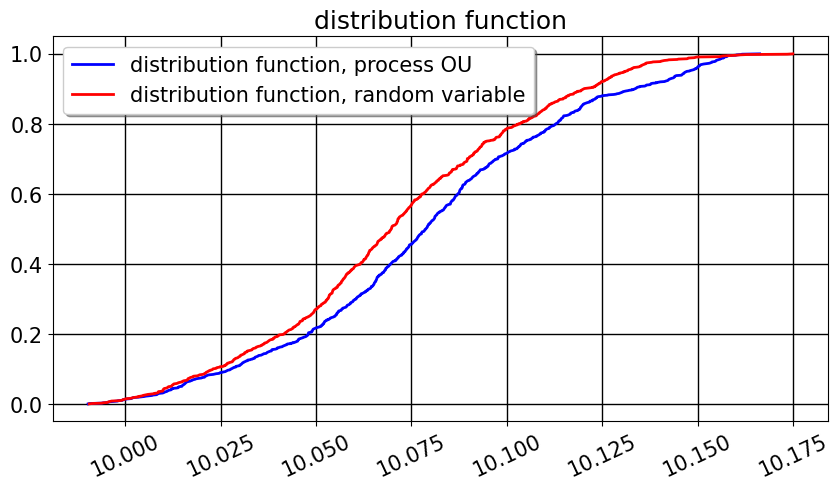

In [224]:
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()
ax.plot(np.sort(X_ou), [i / N for i in range(N)], 'b', linewidth=2, label='distribution function, process OU')
ax.plot(np.sort(Y_ou), [i / N for i in range(N)], 'r', linewidth=2, label='distribution function, random variable')

ax.grid(color = 'black',    #  цвет линий
            linewidth = 1,    #  толщина
            linestyle = '-')    #  начертание
plt.legend(loc = 'best', fancybox = True, shadow = True)

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.05))  # интервал написания значений оси OX
#plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))  # интервал написания значений оси OY
plt.xticks(rotation=25)

fig.set_figwidth(10)
fig.set_figheight(5)

plt.title(f'distribution function')
plt.show()

(array([ 13.,  23.,  44.,  39.,  56.,  61.,  94., 110., 109.,  97.,  75.,
         68.,  57.,  50.,  45.,  35.,  10.,   7.,   5.,   2.]),
 array([ 9.99051782,  9.99973933, 10.00896084, 10.01818235, 10.02740386,
        10.03662538, 10.04584689, 10.0550684 , 10.06428991, 10.07351142,
        10.08273293, 10.09195444, 10.10117595, 10.11039746, 10.11961897,
        10.12884049, 10.138062  , 10.14728351, 10.15650502, 10.16572653,
        10.17494804]),
 <BarContainer object of 20 artists>)

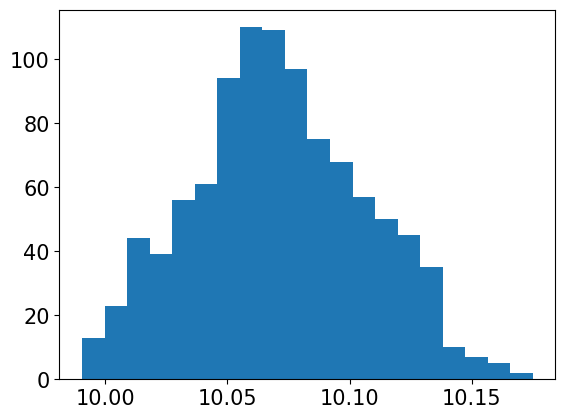

In [244]:
plt.hist(Y_ou, bins=20)

In [247]:
np.quantile(Y_ou, 0.9)

10.120266451824845

In [234]:
np.savetxt('data/ou_process.csv', X_ou, delimiter=" , ")
np.savetxt('data/ou_rv.csv', Y_ou, delimiter=" , ")

#### point(b) geometric Brownian motion model

In [180]:
def BSM(X, theta1, theta2, dW, dt):
    dX = theta1 * X * dt + theta2 * X * dW
    return dX

In [181]:
def expected_value_BSM(X_0, theta1, theta2, t):
    expected_value = X_0 * np.exp(theta1 * t)
    return expected_value

In [182]:
def variance_BSM(X_0, theta1, theta2, t):
    variance = (X_0 ** 2) * np.exp(2 * theta1 * t) * (np.exp((theta2 ** 2) * t) - 1)
    return variance

In [213]:
theta1 = 0.01
theta2 = 0.1
N = 1000
dW = np.random.normal(0, np.sqrt(1 / N), N)
X_bsm = np.zeros(N)
X_bsm[0] = 1
Y_bsm = np.zeros(N)
Y_bsm[0] = X_bsm[0]

for i in range(1, N):
    dX = BSM(X_bsm[i - 1], theta1, theta2, dW[i], 1 / N)
    X_bsm[i] = X_bsm[i - 1] + dX

    loc = expected_value_BSM(X_bsm[i], theta1, theta2, i / N)
    scale = variance_BSM(X_bsm[i], theta1, theta2, i / N)
    Y_bsm[i] = np.random.normal(loc, scale, 1)


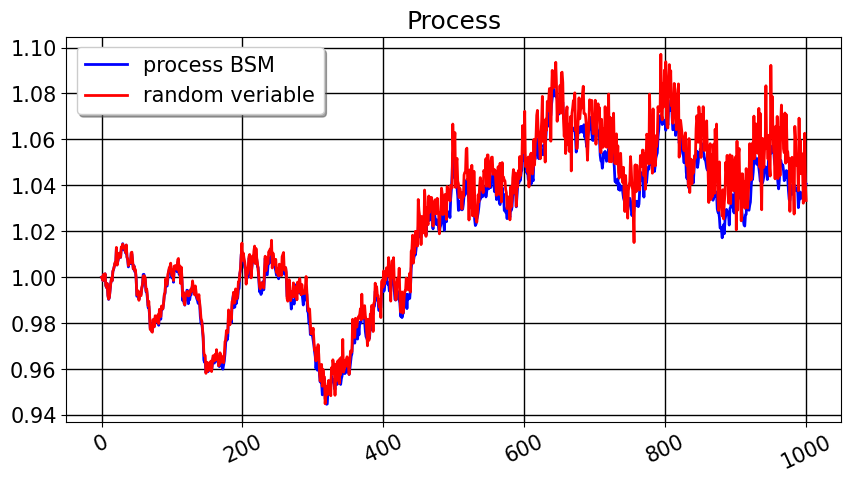

In [229]:
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()
ax.plot()
ax.plot(np.linspace(0, N, N), X_bsm, 'b', linewidth=2, label='process BSM')
ax.plot(np.linspace(0, N, N), Y_bsm, 'r', linewidth=2, label='random veriable')

ax.grid(color = 'black',    #  цвет линий
            linewidth = 1,    #  толщина
            linestyle = '-')    #  начертание
plt.legend(loc = 'best', fancybox = True, shadow = True)

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.05))  # интервал написания значений оси OX
#plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))  # интервал написания значений оси OY
plt.xticks(rotation=25)

fig.set_figwidth(10)
fig.set_figheight(5)

plt.title(f'Process')
plt.show()



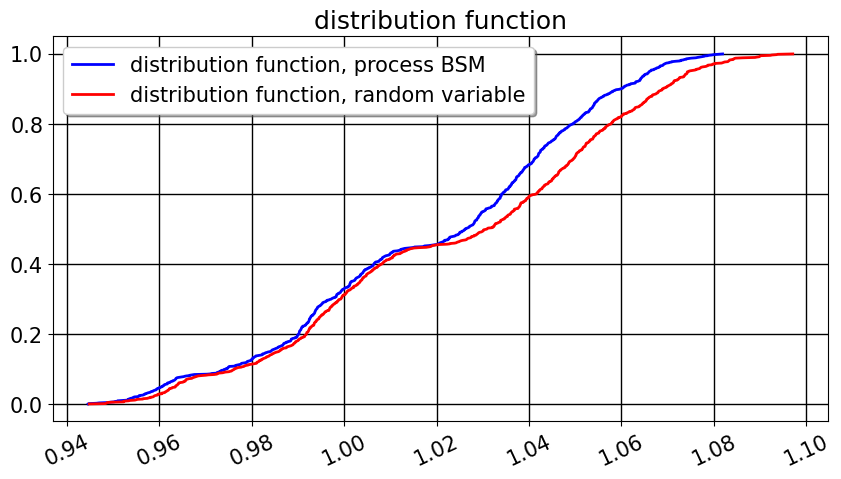

In [226]:
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()
ax.plot(np.sort(X_bsm), [i / N for i in range(N)], 'b', linewidth=2, label='distribution function, process BSM')
ax.plot(np.sort(Y_bsm), [i / N for i in range(N)], 'r', linewidth=2, label='distribution function, random variable')

ax.grid(color = 'black',    #  цвет линий
            linewidth = 1,    #  толщина
            linestyle = '-')    #  начертание
plt.legend(loc = 'best', fancybox = True, shadow = True)

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.05))  # интервал написания значений оси OX
#plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))  # интервал написания значений оси OY
plt.xticks(rotation=25)

fig.set_figwidth(10)
fig.set_figheight(5)

plt.title(f'distribution function')
plt.show()

(array([  8.,  21.,  48.,  16.,  39.,  55., 102.,  89.,  60.,  18.,  27.,
         64.,  81.,  99.,  87.,  66.,  65.,  29.,  17.,   9.]),
 array([0.94484362, 0.95245539, 0.96006717, 0.96767894, 0.97529071,
        0.98290249, 0.99051426, 0.99812604, 1.00573781, 1.01334959,
        1.02096136, 1.02857313, 1.03618491, 1.04379668, 1.05140846,
        1.05902023, 1.066632  , 1.07424378, 1.08185555, 1.08946733,
        1.0970791 ]),
 <BarContainer object of 20 artists>)

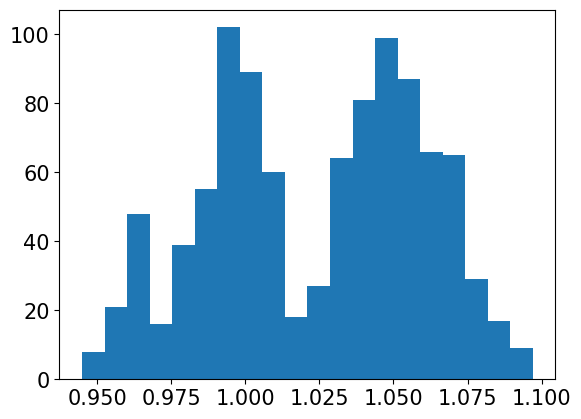

In [245]:
plt.hist(Y_bsm, bins=20)

In [248]:
np.quantile(Y_bsm, 0.9)

1.068938173214638

In [235]:
np.savetxt('data/bsm_process.csv', X_bsm, delimiter=" , ")
np.savetxt('data/bsm_rv.csv', Y_bsm, delimiter=" , ")

#### point(c) The Cox-Ingersoll-Ross (CIR) model

In [218]:
def CIR(X, Y, theta1, theta2, theta3, dW, dt):
    dX = (theta1 - theta2 * X) * dt + theta3 * np.sqrt(X) * dW
    return dX

In [219]:
def expected_value_CIR(X_0, theta1, theta2, theta3, t):
    expected_value = (theta1 / theta2) + (X_0 - theta1 / theta2) * np.exp(-theta2 * t)
    return expected_value

In [220]:
def variance_CIR(X_0, theta1, theta2, theta3, t):
    variance = X_0 * (theta3 ** 2) * (np.exp(-theta2 * t) - np.exp(-2 * theta2 * t)) / theta2 + (theta1 * theta3 ** 2) * (1 - np.exp(-2 * theta2 * t)) / (2 * theta2 ** 2) 

In [221]:
theta1 = 0.01
theta2 = 0.1
N = 1000
dW = np.random.normal(0, np.sqrt(1 / N), N)
X_cir = np.zeros(N)
X_cir[0] = 1
Y_cir = np.zeros(N)
Y_cir[0] = X_cir[0]

for i in range(1, N):
    dX = BSM(X_cir[i - 1], theta1, theta2, dW[i], 1 / N)
    X_cir[i] = X_cir[i - 1] + dX

    loc = expected_value_BSM(X_cir[i], theta1, theta2, i / N)
    scale = variance_BSM(X_cir[i], theta1, theta2, i / N)
    Y_cir[i] = np.random.normal(loc, scale, 1)


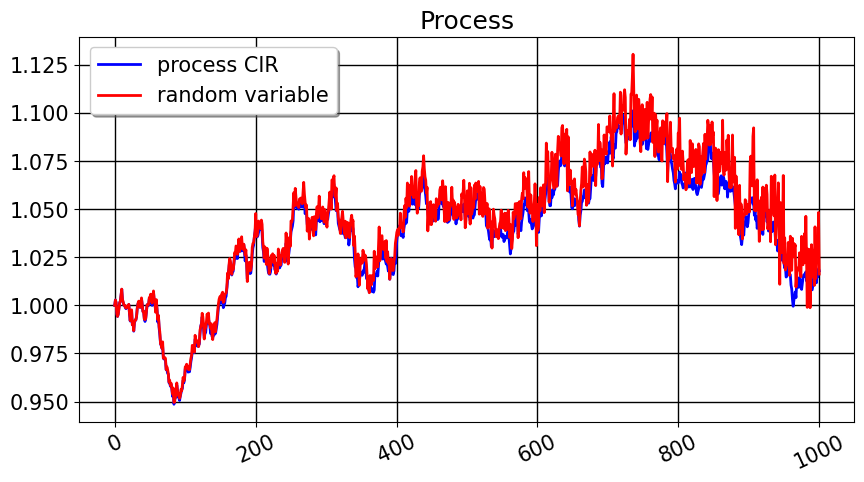

In [228]:
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()
ax.plot()
ax.plot(np.linspace(0, N, N), X_cir, 'b', linewidth=2, label='process CIR')
ax.plot(np.linspace(0, N, N), Y_cir, 'r', linewidth=2, label='random variable')

ax.grid(color = 'black',    #  цвет линий
            linewidth = 1,    #  толщина
            linestyle = '-')    #  начертание
plt.legend(loc = 'best', fancybox = True, shadow = True)

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.05))  # интервал написания значений оси OX
#plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))  # интервал написания значений оси OY
plt.xticks(rotation=25)

fig.set_figwidth(10)
fig.set_figheight(5)

plt.title(f'Process')
plt.show()



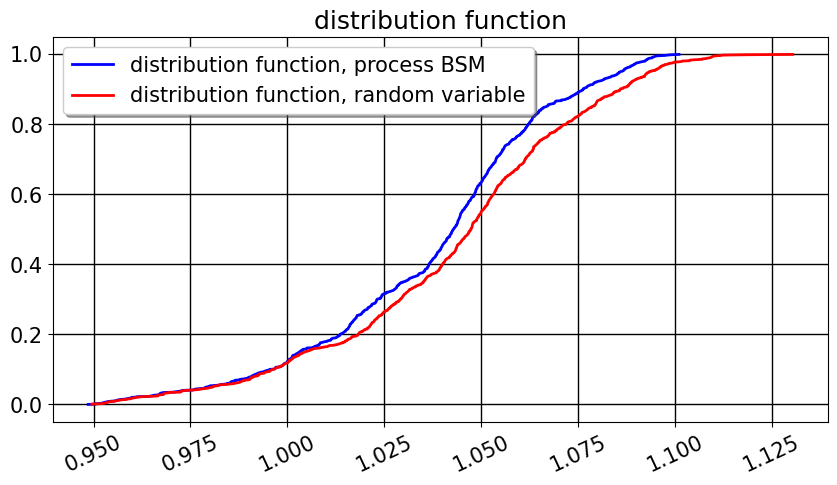

In [231]:
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()
ax.plot(np.sort(X_cir), [i / N for i in range(N)], 'b', linewidth=2, label='distribution function, process BSM')
ax.plot(np.sort(Y_cir), [i / N for i in range(N)], 'r', linewidth=2, label='distribution function, random variable')

ax.grid(color = 'black',    #  цвет линий
            linewidth = 1,    #  толщина
            linestyle = '-')    #  начертание
plt.legend(loc = 'best', fancybox = True, shadow = True)

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.05))  # интервал написания значений оси OX
#plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))  # интервал написания значений оси OY
plt.xticks(rotation=25)

fig.set_figwidth(10)
fig.set_figheight(5)

plt.title(f'distribution function')
plt.show()

(array([ 16.,  12.,  15.,  16.,  35.,  52.,  25.,  64.,  86.,  78., 133.,
        130., 103.,  70.,  60.,  58.,  28.,  16.,   2.,   1.]),
 array([0.94954169, 0.95858779, 0.9676339 , 0.97668   , 0.9857261 ,
        0.9947722 , 1.0038183 , 1.0128644 , 1.0219105 , 1.03095661,
        1.04000271, 1.04904881, 1.05809491, 1.06714101, 1.07618711,
        1.08523321, 1.09427932, 1.10332542, 1.11237152, 1.12141762,
        1.13046372]),
 <BarContainer object of 20 artists>)

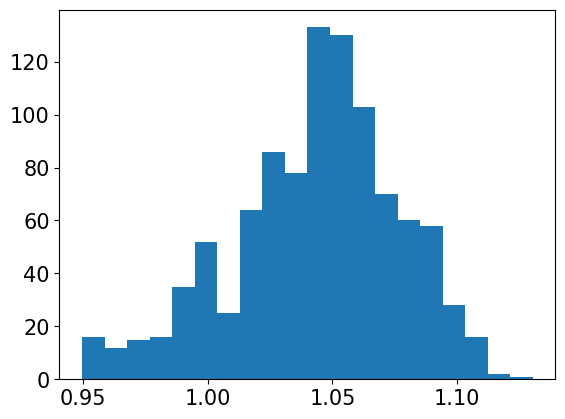

In [246]:
plt.hist(Y_cir, bins=20)

In [249]:
np.quantile(Y_cir, 0.9)

1.0859109072180015

In [236]:
np.savetxt('data/cir_process.csv', X_cir, delimiter=" , ")
np.savetxt('data/cir_rv.csv', Y_cir, delimiter=" , ")